In [1]:
import numpy as np
input_vector = np.array([2, 4, 11])
print(input_vector)

[ 2  4 11]


In [2]:
import numpy as np
input_vector = np.array([2, 4, 11])
input_vector = np.array(input_vector, ndmin=2).T
print(input_vector, input_vector.shape)

[[ 2]
 [ 4]
 [11]] (3, 1)


In [3]:
number_of_samples = 1200
low = -1
high = 0
s = np.random.uniform(low, high, number_of_samples)
# s is in the interval [-1, 0) :
print(np.all(s >= -1) and np.all(s < 0))

True


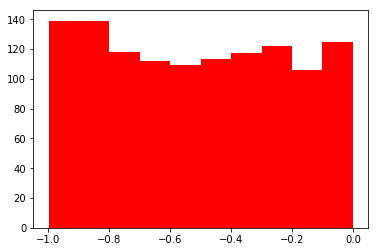

In [4]:
import matplotlib.pyplot as plt
plt.hist(s,color='r')
plt.show()

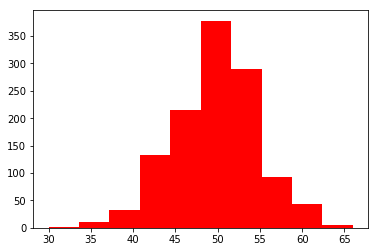

In [5]:
s = np.random.binomial(100, 0.5, 1200)
plt.hist(s,color='r')
plt.show()

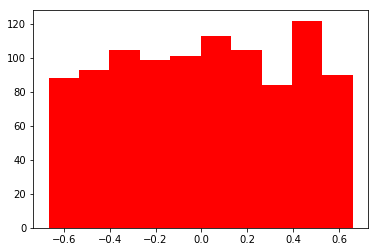

In [6]:
from scipy.stats import truncnorm
s = truncnorm(a=-2/3., b=2/3., scale=1, loc=0).rvs(size=1000)
plt.hist(s,color='r')
plt.show()

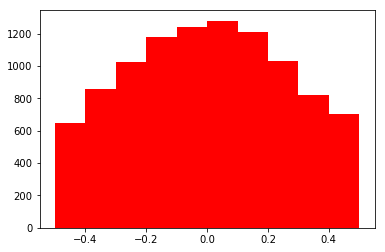

In [7]:
def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)
X = truncated_normal(mean=0, sd=0.4, low=-0.5, upp=0.5)
s = X.rvs(10000)
plt.hist(s,color='r')
plt.show()

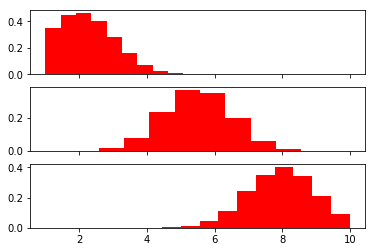

In [8]:
X1 = truncated_normal(mean=2, sd=1, low=1, upp=10)
X2 = truncated_normal(mean=5.5, sd=1, low=1, upp=10)
X3 = truncated_normal(mean=8, sd=1, low=1, upp=10)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(3, sharex=True)
ax[0].hist(X1.rvs(10000),color='r', normed=True)
ax[1].hist(X2.rvs(10000),color='r', normed=True)
ax[2].hist(X3.rvs(10000),color='r', normed=True)
plt.show()

In [9]:
no_of_input_nodes = 3
no_of_hidden_nodes = 4
rad = 1 / np.sqrt(no_of_input_nodes)
X = truncated_normal(mean=2, sd=1, low=-rad, upp=rad)
wih = X.rvs((no_of_hidden_nodes, no_of_input_nodes))
wih

array([[-0.29388041,  0.28410562,  0.18073129],
       [ 0.49237305,  0.21730496,  0.18393912],
       [-0.38234563,  0.54503297,  0.42529101],
       [ 0.50910183,  0.04593636,  0.30766525]])

In [10]:
no_of_hidden_nodes = 4
no_of_output_nodes = 2
rad = 1 / np.sqrt(no_of_hidden_nodes)
X = truncated_normal(mean=2, sd=1, low=-rad, upp=rad)
who = X.rvs((no_of_output_nodes, no_of_hidden_nodes))
who

array([[ 0.38160687,  0.43609446,  0.13990149, -0.05079619],
       [-0.16221899,  0.12662874,  0.18335234,  0.08515253]])

In [11]:
class NeuralNetwork:
    
    def __init__(self, 
                 no_of_in_nodes, 
                 no_of_out_nodes, 
                 no_of_hidden_nodes,
                 learning_rate):
        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes 
        self.no_of_hidden_nodes = no_of_hidden_nodes
        self.learning_rate = learning_rate  
        self.create_weight_matrices()
        
    def create_weight_matrices(self):
        rad = 1 / np.sqrt(self.no_of_in_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_in_hidden = X.rvs((self.no_of_hidden_nodes, 
                                       self.no_of_in_nodes))
        rad = 1 / np.sqrt(self.no_of_hidden_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_hidden_out = X.rvs((self.no_of_out_nodes, 
                                        self.no_of_hidden_nodes))
             
    
    def train(self):
        pass
    
    def run(self):
        pass

In [12]:
if __name__ == "__main__":
    simple_network = NeuralNetwork(no_of_in_nodes = 3, 
                                   no_of_out_nodes = 2, 
                                   no_of_hidden_nodes = 4,
                                   learning_rate = 0.1)
    print(simple_network.weights_in_hidden)
    print(simple_network.weights_hidden_out)

[[ 0.55249088 -0.15519353  0.17860997]
 [ 0.26072416  0.04216827  0.09974754]
 [-0.50967014 -0.00885941 -0.02426559]
 [-0.25959892  0.06622383 -0.2976071 ]]
[[ 0.4727406  -0.40966999  0.42785309  0.34210467]
 [ 0.07473862 -0.22212782 -0.12969118 -0.09148549]]


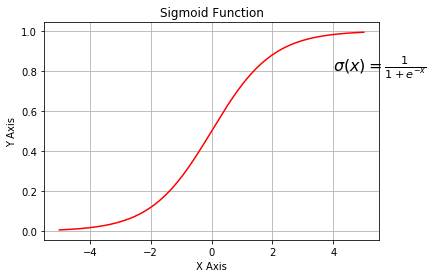

In [13]:
def sigma(x):
    return 1 / (1 + np.exp(-x))
X = np.linspace(-5, 5, 1000)
plt.plot(X, sigma(X),'r')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Sigmoid Function')
plt.grid()
plt.text(4, 0.8, r'$\sigma(x)=\frac{1}{1+e^{-x}}$', fontsize=16)
plt.show()

In [14]:
from scipy.special import expit
print(expit(3.4))
print(expit([3, 4, 1]))
print(expit(np.array([0.8, 2.3, 8])))

0.9677045353015494
[0.95257413 0.98201379 0.73105858]
[0.68997448 0.90887704 0.99966465]


In [15]:
import numpy as np
from scipy.special import expit as activation_function
from scipy.stats import truncnorm
def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)
class NeuralNetwork:
           
    def __init__(self, 
                 no_of_in_nodes, 
                 no_of_out_nodes, 
                 no_of_hidden_nodes,
                 learning_rate):
        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes
        self.no_of_hidden_nodes = no_of_hidden_nodes
        self.learning_rate = learning_rate 
        self.create_weight_matrices()
        
    def create_weight_matrices(self):
        rad = 1 / np.sqrt(self.no_of_in_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_in_hidden = X.rvs((self.no_of_hidden_nodes, 
                                       self.no_of_in_nodes))
        rad = 1 / np.sqrt(self.no_of_hidden_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_hidden_out = X.rvs((self.no_of_out_nodes, 
                                        self.no_of_hidden_nodes))
    
    
    def train(self, input_vector, target_vector):
        pass
            
    
    def run(self, input_vector):
        
        # turning the input vector into a column vector
        input_vector = np.array(input_vector, ndmin=2).T
        output_vector = np.dot(self.weights_in_hidden, input_vector)
        output_vector = activation_function(output_vector)
        
        output_vector = np.dot(self.weights_hidden_out, output_vector)
        output_vector = activation_function(output_vector)
    
        return output_vector

In [16]:
simple_network = NeuralNetwork(no_of_in_nodes=2, 
                               no_of_out_nodes=2, 
                               no_of_hidden_nodes=10,
                               learning_rate=0.6)
simple_network.run([(3, 4)])

array([[0.42075993],
       [0.55768745]])

In [17]:
@np.vectorize
def sigmoid(x):
    return 1 / (1 + np.e ** -x)
#sigmoid = np.vectorize(sigmoid)
sigmoid([3, 4, 5])

array([0.95257413, 0.98201379, 0.99330715])

In [18]:
import numpy as np

@np.vectorize
def sigmoid(x):
    return 1 / (1 + np.e ** -x)

activation_function = sigmoid

from scipy.stats import truncnorm

def truncated_normal(mean=0, sd=1, low=0, upp=10):
   
    return truncnorm((low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

class NeuralNetwork:
    
    def __init__(self, 
                 no_of_in_nodes, 
                 no_of_out_nodes, 
                 no_of_hidden_nodes,
                 learning_rate):
        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes
        self.no_of_hidden_nodes = no_of_hidden_nodes
        self.learning_rate = learning_rate 
        self.create_weight_matrices()
        
    def create_weight_matrices(self):
       
        rad = 1 / np.sqrt(self.no_of_in_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_in_hidden = X.rvs((self.no_of_hidden_nodes, 
                                       self.no_of_in_nodes))
        rad = 1 / np.sqrt(self.no_of_hidden_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_hidden_out = X.rvs((self.no_of_out_nodes, 
                                        self.no_of_hidden_nodes))
        
    
    def train(self, input_vector, target_vector):
        # input_vector and target_vector can be tuple, list or ndarray
        
        input_vector = np.array(input_vector, ndmin=2).T
        target_vector = np.array(target_vector, ndmin=2).T
        
        output_vector1 = np.dot(self.weights_in_hidden, input_vector)
        output_vector_hidden = activation_function(output_vector1)
        
        output_vector2 = np.dot(self.weights_hidden_out, output_vector_hidden)
        output_vector_network = activation_function(output_vector2)
        
        output_errors = target_vector - output_vector_network
        # update the weights:
        tmp = output_errors * output_vector_network * (1.0 - output_vector_network)     
        tmp = self.learning_rate  * np.dot(tmp, output_vector_hidden.T)
        self.weights_hidden_out += tmp
        # calculate hidden errors:
        hidden_errors = np.dot(self.weights_hidden_out.T, output_errors)
        # update the weights:
        tmp = hidden_errors * output_vector_hidden * (1.0 - output_vector_hidden)
        self.weights_in_hidden += self.learning_rate * np.dot(tmp, input_vector.T)
           
    
    def run(self, input_vector):
        # input_vector can be tuple, list or ndarray
        input_vector = np.array(input_vector, ndmin=2).T
        output_vector = np.dot(self.weights_in_hidden, input_vector)
        output_vector = activation_function(output_vector)
        
        output_vector = np.dot(self.weights_hidden_out, output_vector)
        output_vector = activation_function(output_vector)
    
        return output_vector

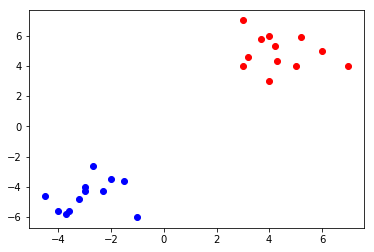

In [19]:
data1 = [((3, 4), (0.99, 0.01)), ((4.2, 5.3), (0.99, 0.01)), 
         ((4, 3), (0.99, 0.01)), ((6, 5), (0.99, 0.01)), 
         ((4, 6), (0.99, 0.01)), ((3.7, 5.8), (0.99, 0.01)), 
         ((3.2, 4.6), (0.99, 0.01)), ((5.2, 5.9), (0.99, 0.01)), 
         ((5, 4), (0.99, 0.01)), ((7, 4), (0.99, 0.01)), 
         ((3, 7), (0.99, 0.01)), ((4.3, 4.3), (0.99, 0.01))]

data2 = [((-3, -4), (0.01, 0.99)), ((-2, -3.5), (0.01, 0.99)), 
         ((-1, -6), (0.01, 0.99)), ((-3, -4.3), (0.01, 0.99)), 
         ((-4, -5.6), (0.01, 0.99)), ((-3.2, -4.8), (0.01, 0.99)), 
         ((-2.3, -4.3), (0.01, 0.99)), ((-2.7, -2.6), (0.01, 0.99)), 
         ((-1.5, -3.6), (0.01, 0.99)), ((-3.6, -5.6), (0.01, 0.99)), 
         ((-4.5, -4.6), (0.01, 0.99)), ((-3.7, -5.8), (0.01, 0.99))]
data = data1 + data2
np.random.shuffle(data)
points1, labels1 = zip(*data1)
X, Y = zip(*points1)
plt.scatter(X, Y, c="r")
points2, labels2 = zip(*data2)
X, Y = zip(*points2)
plt.scatter(X, Y, c="b")
plt.show()

In [20]:
simple_network = NeuralNetwork(no_of_in_nodes=2, 
                               no_of_out_nodes=2, 
                               no_of_hidden_nodes=2,
                               learning_rate=0.6)
    
size_of_learn_sample = int(len(data)*0.9)
learn_data = data[:size_of_learn_sample]
test_data = data[-size_of_learn_sample:]
print()
for i in range(size_of_learn_sample):
    point, label = learn_data[i][0], learn_data[i][1]
    simple_network.train(point, label)
    
for i in range(size_of_learn_sample):
    point, label = learn_data[i][0], learn_data[i][1]
    cls1, cls2 =simple_network.run(point)
    print(point, cls1, cls2, end=": ")
    if cls1 > cls2:
        if label == (0.99, 0.01):
            print("class1 correct", label)
        else:
            print("class2 incorrect", label)
    else:
        if label == (0.01, 0.99):
            print("class1 correct", label)
        else:
            print("class2 incorrect", label)


(-3, -4.3) [0.28090705] [0.75874933]: class1 correct (0.01, 0.99)
(-3.2, -4.8) [0.2801233] [0.75969023]: class1 correct (0.01, 0.99)
(3, 7) [0.49977545] [0.50026634]: class2 incorrect (0.99, 0.01)
(-4, -5.6) [0.27940196] [0.76052484]: class1 correct (0.01, 0.99)
(3.2, 4.6) [0.49816747] [0.50242909]: class2 incorrect (0.99, 0.01)
(4, 6) [0.49956115] [0.50058867]: class2 incorrect (0.99, 0.01)
(4, 3) [0.49293173] [0.51072194]: class2 incorrect (0.99, 0.01)
(-1.5, -3.6) [0.28414996] [0.75544278]: class1 correct (0.01, 0.99)
(5, 4) [0.49745415] [0.50405321]: class2 incorrect (0.99, 0.01)
(3.7, 5.8) [0.49944189] [0.50073504]: class2 incorrect (0.99, 0.01)
(6, 5) [0.49908148] [0.50152434]: class2 incorrect (0.99, 0.01)
(-3.7, -5.8) [0.27934103] [0.76061959]: class1 correct (0.01, 0.99)
(-4.5, -4.6) [0.28010086] [0.75952296]: class1 correct (0.01, 0.99)
(5.2, 5.9) [0.49959599] [0.50060719]: class2 incorrect (0.99, 0.01)
(-2.3, -4.3) [0.28123583] [0.75851892]: class1 correct (0.01, 0.99)
(-2.

In [21]:
# alternative activation function
def ReLU(x):
    return np.maximum(0.0, x)
# derivation of relu
def ReLU_derivation(x):
    if x <= 0:
        return 0
    else:
        return 1

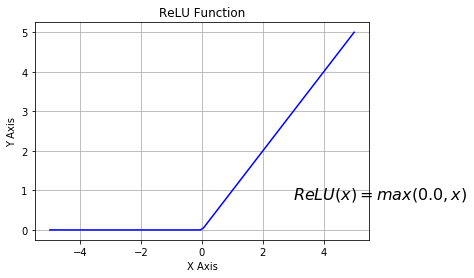

In [22]:
X = np.linspace(-5, 5, 100)
plt.plot(X, ReLU(X),'b')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('ReLU Function')
plt.grid()
plt.text(3, 0.8, r'$ReLU(x)=max(0.0, x)$', fontsize=16)
plt.show()

In [23]:
import numpy as np

@np.vectorize
def sigmoid(x):
    return 1 / (1 + np.e ** -x)
activation_function = sigmoid

from scipy.stats import truncnorm

def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm((low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

class NeuralNetwork:
        
    
    def __init__(self, no_of_in_nodes, no_of_out_nodes, no_of_hidden_nodes, learning_rate, bias=None):
        
        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes
        
        self.no_of_hidden_nodes = no_of_hidden_nodes
            
        self.learning_rate = learning_rate 
        self.bias = bias
        self.create_weight_matrices()
    
        
    
    def create_weight_matrices(self):
        
        bias_node = 1 if self.bias else 0
        
        rad = 1 / np.sqrt(self.no_of_in_nodes + bias_node)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_in_hidden = X.rvs((self.no_of_hidden_nodes, 
                                       self.no_of_in_nodes + bias_node))
        rad = 1 / np.sqrt(self.no_of_hidden_nodes + bias_node)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_hidden_out = X.rvs((self.no_of_out_nodes, 
                                        self.no_of_hidden_nodes + bias_node))
        
        
        
    def train(self, input_vector, target_vector):
        # input_vector and target_vector can be tuple, list or ndarray
        
        bias_node = 1 if self.bias else 0
        if self.bias:
            # adding bias node to the end of the inpuy_vector
            input_vector = np.concatenate( (input_vector, [self.bias]) )
                                    
            
        input_vector = np.array(input_vector, ndmin=2).T
        target_vector = np.array(target_vector, ndmin=2).T
        
        output_vector1 = np.dot(self.weights_in_hidden, input_vector)
        output_vector_hidden = activation_function(output_vector1)
        
        if self.bias:
            output_vector_hidden = np.concatenate( (output_vector_hidden, [[self.bias]]) )
        
        
        output_vector2 = np.dot(self.weights_hidden_out, output_vector_hidden)
        output_vector_network = activation_function(output_vector2)
        
        output_errors = target_vector - output_vector_network
        # update the weights:
        tmp = output_errors * output_vector_network * (1.0 - output_vector_network)     
        tmp = self.learning_rate  * np.dot(tmp, output_vector_hidden.T)
        self.weights_hidden_out += tmp
        # calculate hidden errors:
        hidden_errors = np.dot(self.weights_hidden_out.T, output_errors)
        # update the weights:
        tmp = hidden_errors * output_vector_hidden * (1.0 - output_vector_hidden)
        if self.bias:
            x = np.dot(tmp, input_vector.T)[:-1,:]     
        else:
            x = np.dot(tmp, input_vector.T)
        self.weights_in_hidden += self.learning_rate * x
        
       
    
    def run(self, input_vector):
        # input_vector can be tuple, list or ndarray
        
        if self.bias:
            # adding bias node to the end of the inpuy_vector
            input_vector = np.concatenate( (input_vector, [1]) )
        input_vector = np.array(input_vector, ndmin=2).T
        output_vector = np.dot(self.weights_in_hidden, input_vector)
        output_vector = activation_function(output_vector)
        
        if self.bias:
            output_vector = np.concatenate( (output_vector, [[1]]) )
            
        output_vector = np.dot(self.weights_hidden_out, output_vector)
        output_vector = activation_function(output_vector)
    
        return output_vector

In [24]:
class1 = [(3, 4), (4.2, 5.3), (4, 3), (6, 5), (4, 6), (3.7, 5.8),
          (3.2, 4.6), (5.2, 5.9), (5, 4), (7, 4), (3, 7), (4.3, 4.3) ] 
class2 = [(-3, -4), (-2, -3.5), (-1, -6), (-3, -4.3), (-4, -5.6), 
          (-3.2, -4.8), (-2.3, -4.3), (-2.7, -2.6), (-1.5, -3.6), 
          (-3.6, -5.6), (-4.5, -4.6), (-3.7, -5.8) ]
labeled_data = []
for el in class1:
    labeled_data.append( [el, [1, 0]])
for el in class2:
    labeled_data.append([el, [0, 1]])
  
np.random.shuffle(labeled_data)
print(labeled_data[:10])
data, labels = zip(*labeled_data)
labels = np.array(labels)
data = np.array(data)

[[(-3, -4), [0, 1]], [(4.3, 4.3), [1, 0]], [(-3, -4.3), [0, 1]], [(5, 4), [1, 0]], [(-2.3, -4.3), [0, 1]], [(-1, -6), [0, 1]], [(3.7, 5.8), [1, 0]], [(-2, -3.5), [0, 1]], [(4, 6), [1, 0]], [(5.2, 5.9), [1, 0]]]


In [31]:
simple_network = NeuralNetwork(no_of_in_nodes=2, 
                               no_of_out_nodes=2, 
                               no_of_hidden_nodes=10,
                               learning_rate=0.1,
                               bias=None)
def accuracy(i,j):
    return((j/i)*100)

for _ in range(20):
    for i in range(len(data)):
        simple_network.train(data[i], labels[i])
for i in range(len(data)):
    print(labels[i])
    print(simple_network.run(data[i]))

[0 1]
[[0.24472359]
 [0.78968954]]
[1 0]
[[0.95794591]
 [0.05342865]]
[0 1]
[[0.24345604]
 [0.79147965]]
[1 0]
[[0.95705556]
 [0.05440824]]
[0 1]
[[0.2414865 ]
 [0.79541842]]
[0 1]
[[0.23615134]
 [0.80770759]]
[1 0]
[[0.95946773]
 [0.05239286]]
[0 1]
[[0.24568606]
 [0.790556  ]]
[1 0]
[[0.95939394]
 [0.05272049]]
[1 0]
[[0.95863933]
 [0.05397397]]
[0 1]
[[0.24220861]
 [0.79327289]]
[0 1]
[[0.25856568]
 [0.77546812]]
[1 0]
[[0.95736589]
 [0.05488189]]
[1 0]
[[0.95888044]
 [0.05299624]]
[0 1]
[[0.24256833]
 [0.79270503]]
[1 0]
[[0.95900676]
 [0.05209206]]
[0 1]
[[0.24733761]
 [0.78338989]]
[1 0]
[[0.96016944]
 [0.05144924]]
[1 0]
[[0.9559703 ]
 [0.05494476]]
[1 0]
[[0.95552707]
 [0.05666202]]
[0 1]
[[0.24467501]
 [0.79296616]]
[1 0]
[[0.95848809]
 [0.05229483]]
[0 1]
[[0.24219292]
 [0.79331041]]
[0 1]
[[0.24326847]
 [0.79078766]]
